# Алгоритм Евклида

Наиболее оптимальным алгоритмом нахождения НОД целых чисел считается, т.н. алгоритм Евклида:

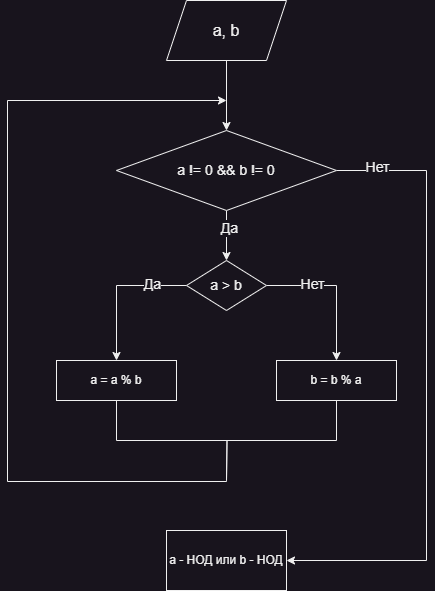

In [2]:
def findGCD(a: int, b:int):
    while ( a!= 0 and b!= 0):
        if abs(a) > abs(b):
            a = a % b
        else:
            b = b % a
    return a + b

In [6]:
findGCD(45, 15)

15

In [5]:
from math import gcd
gcd(45, 15)

15

# Наименьшее общее кратное

**НОД** и **НОК** связаны следующей формулой:<br>
$$lcm = \frac{a \cdot b}{gcd(a, b)}$$

In [7]:
def findLCM(a, b):
    return a * b / findGCD(a, b)

In [8]:
findLCM(44, 48)

528.0

# Решето Эратосфена

Решетом Эратосфена называют алгоритм нахождения всех простых чисел от 1 до заданного **n**<br>
В простейшем виде алгоритм выглядит так:
1. Записываем ряд чисел от 1 до n
2. Начиная с 2 проходимся указателем по ряду: если число простое, то запускаем ещё один цикл, где вычёркиваем каждое число, кратное указателю

In [9]:
# данная вариация работает за порядка O(nlog(log(n)))
def findPrimes(n: int):
    isPrime = [True for _ in range(n + 1)]
    for i in range(2, n + 1):
        if (isPrime[i]):
            for j in range(2 * i, n + 1, i):
                isPrime[j] = False
    return isPrime

In [19]:
cache = findPrimes(100)
for i in range(2, 100):
    if cache[i]:
        print(i, end = ' ')

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

# Метод префиксных сумм

Существует отдельный класс задач, когда нам нужно отвечать на множественные запросы о свойствах какого-либо отрезка массива за наименьшее время - одним из методов решения является преподсчёт значений, для данной операции (в нашем случае суммы элементов)

**Задача.** Дан массив целых чисел. Определите, есть ли в нём подотрезок заданной суммы за линейное время.

In [36]:
from random import randint

N = 5

data = [ randint(1, 500) for _ in range(N)]
print(*data)

6 441 354 247 188


In [26]:
def pref_sum(data: list) -> list:
    result = [0 for _ in range(N + 1)]
    for i in range(1, N + 1):
        result[i] = result[i - 1] + data[i - 1]

    return result

In [38]:
pref_sum(data)

[0, 6, 447, 801, 1048, 1236]

In [34]:
def find_sum(data : list, _sum: int) ->bool:
    sums = pref_sum(data)
    for i in range(1, N):
        for j in range(i, N + 1):
            cur_sum = sums[j] - sums[i - 1] 
            if cur_sum == _sum:
                return True
    return False

In [40]:
find_sum(data, 601)

True

In [39]:
def find_sum_lin(data: list, _sum: int):
    sums = pref_sum(data)
    i = 1
    j = 1
    while (i < N + 1):
        cur_sum = sums[j] - sums[i - 1] 
        if cur_sum == _sum:
            return True
        if (cur_sum > _sum):
            i+= 1
        else:
            j+= 1
    return False
    

In [44]:
find_sum(data, 435)

True